# Что такое машинное обучение

## Область применения

Машинное обучение (от англ. *machine learning*) – это область знаний на стыке линейной алгебры, теории вероятностей и методов оптимизации

говорят, что модель обучается на опыте $E$ относительно класса задач $T$ в смысле меры качества $L$, если при решении задачи $T$ качество, измеряемое мерой $L$ , возрастает при демонстрации нового опыта $D$.

Говоря простым языком, если правльным образом разработать процесс анализа поступающих в систему машинного обучения данных, то система сможет проводить аналогичную обработку без участия разработчика.

Алгоритмы ML используются везде, где нужно автоматизировано (т.е. в большом количестве) принимать решения:

* вычисление спам-писем в почте
* рекомендации товаров в онлайн-ритейле ("с этим товаром покупают")
* подбор музыки на основании вкусов пользователя
* детекция эротических или жестоких сцен в видео контенте

Зачем нужно разрабатывать ML проекты, когда в каждой из областей есть экспертные знания?

* сложно придумать правила  в понятном человеку виде (например, распознавание изображений)
* эвристики устаревают и нужно придумывать новые (борьба со спамом - непрерывный процесс)

## Неформальное определение

Допустим, вы хотите решить какую-то задачу (например, выявление спам-смс) с помощью ML. Независимо от доменной области ML проект проходит следующие этапы:

1. Выгрузка *обучающей выборки* (например, набор смс)
1. Разметка обучающей выборки (отметить те, которые являются спамом). Хотя некоторые алгоритмы могут работать и без разметки.
1. Выбираем метрику качества решения задачи (долю точно определённых спам-смс)
1. Каждый объект выборки описываем некоторыми признаками, которые называются фичами (признаками) (фичами смс могут стать входящие в него слова)
1. Настраиваем выбранную модель машинного обучения наилучшим образом (тут поможет метрика) решать поставленную задачу

Давайте пройдём по пути создания модели машинного обучения для задачи предсказания цены на недвижимость с помощью машинного обучения.

## Пример: предсказываем цены на недвижимость

Предсказывать цены не недвижимость будем с помощью модели [линейной регрессии](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

### Знакомство с machine learning: линейная регрессия

Линейная регрессия относится в задачам обучения с учителем: опыт $D$ (который в ML называют *обучающей выборкой*) в нашем случае - это набор пар $x_i, y_i$ таких, что

$$
D = \{(x_i, y_i) \}_{i=\overline{1,N}}
$$

Где $y_i$ - это "правильный" ответ(цена недвижимости) на обучающем примере $x_i$ (конкретный объект недвижимости из обучающей выборки), а $N$ - количество обучающих примеров. В задаче линейной регрессии $y \in R$, то есть предсказываь нужно  непрерывную *скалярную* случайную величину.

Каждый объект $x_i$ является совокупностью признаков (англ *features*, фичи) $x_i^1,\ldots, x_i^k$. Размерность признакового пространства может быть разной, т.е. $x_i \in R^k$, где $k$ может принимать значения от 1 (в задаче прогнозирования роста человека по его весу) до десятков тысяч (например, в задаче анализа текстов).

#### Отступление: какие фичи бывают

* бинарные (boolean): True/False, 1/0
* категориальные (categorical), иногда говорят дискретные: сутки можно разделить на три категориальных фичи (`morning`, `day` `night`)
* непрерывные (numerical): количество звонков поступающих в коллцентр

Выявить в задаче "сильные" фичи - это 90% успеха в решении.

Про то, как придумывать фичи есть годная [статья на хабре](https://habr.com/ru/company/ods/blog/325422/)

Модель машинного обучения в общем случае  - это семейство алгоритмов $h(x, \theta): X \times \Theta \rightarrow Y$. Процесс машинного обучения сводится к тому, чтобы по опыту (обучающей выборке) $D$ подобрать такую функцию $h(\cdot)$, что мера качества $L$ будет максимальной, т.е. из семейства алгоритмов нам нужно выбрать один конкретный пример.

Обычно задачу машинного обучения сводят к задаче минимизации эмпирического риска $Q(h(x, \theta), D)$ где
$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

Тогда мы находим лучшую модель $\hat{h}$ из семейства $h$ как  
$$
\hat{h} = \arg\min Q_{\text{emp}}(h, \theta)
$$

Точка минимума эмпирического риска является решением уравнения
$$
\frac{\partial Q_{\text{emp}}}{\partial h} = 0
$$

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. сумма с некоторыми весами "важности") признаков объекта. Сами признаки называются *предикторами*:
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. 
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

Тогда эмпирический риск вычисляется по формуле:
$$
Q_{\text{emp}} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2 = \frac{1}{N}\sum_{i=1}^{N}(y_i - \overline{x}_i^T\overline{w})^2 = \frac{1}{2N}||\overline{Y}-\overline{X}^T\overline{w}||^2 = \frac{1}{2N}\left(\overline{Y}-\overline{X}^T\overline{w}\right)^T\left(\overline{Y}-\overline{X}^T\overline{w}\right)
$$


Такой вид функции потерь называется RSS - *resudal squares sum*, на русский переводится как *остаточная сумма квадратов*.

Где $\hat{y_i}$ - ответ нашего алгоритма машинного обучения $h(x, \theta)$ на примере $x_i$. Чем больше значение $L$ (т.е. чем ближе оно к нулю, т.к. берём со знаком минус) тем лучше наша модель повторяет опыт $X \in m \times n$ где m - количество примеров в обучающей выборке, а $m$ - размерность пространства признаков. $w$ - это вектор параметров модели, который хотим обучить.

Мимнимум эмпирического риска можно найти аналитически, он достигается в точке
$$
\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}
$$

Реализуем функцию для обучения линейной регрессии на python. Загружаем исходные данные - датасет с ценами на дома в Бостоне

In [18]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data # матрица X
y = boston_dataset.target # таргет (целевая переменная)

print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail bu

In [7]:
print(features.shape)
#print('\n',boston_dataset.DESCR)

(506, 13)


Визуализируем цены на недвижимость в виде диаграмы рассеяния

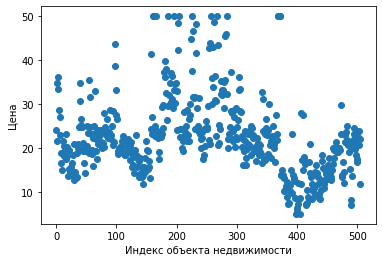

In [6]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(features.shape[0]),
    y
)
subplot.set_xlabel('Индекс объекта недвижимости')
subplot.set_ylabel('Цена')
fig.show()

Код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

#### Самостоятельное задание

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

In [10]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


На самом деле вся математика уже реализована на python, программировать все операции вручную необязательно

In [11]:
from numpy.linalg import inv, norm
from sklearn.linear_model import LinearRegression

# обучаем модель "из коробки"
reg = LinearRegression().fit(features, y)

print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

Коэффициенты, вычисленные моделью sklearn [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Евклидово расстояние между наборами коэффициентов 18.462248828028187



Визуализируем решение

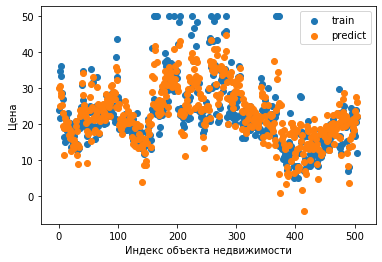

In [12]:
from matplotlib import pyplot as plt

%matplotlib inline

fig, subplot = plt.subplots()
# истинные значения
plt.scatter(
    np.arange(features.shape[0]),
    y, label='train'
)
# предсказанные значения
plt.scatter(
    np.arange(features.shape[0]),
    reg.predict(features), label='predict'
)
subplot.legend()
subplot.set_xlabel('Индекс объекта недвижимости')
subplot.set_ylabel('Цена')
fig.show()

Мы реализовали обучение модели линейной регрессии на языке Python, причём полученные коэффициенты в целом совпадают с результатами, полученными с помощью класса `sklearn.linear_model.LinearRegression`, который является обёрткой над [метотодом для численного решения](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html).

#### Самостоятельное задание

Визуализируйте в виде "столбиков" коэффициенты "из коробки" и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

In [48]:
#-------- ВАШ КОД ТУТ -------------------





#----------------------------------------

### Метрики качества линейной регрессии

В задачах машинного обучения мы хотим сравнивать несколько моделей машинного обучения и выбирать ту из них, которая наилучшим образом решает нашу задачу. Решение о том, какая модель хорошая, а какая плохая, принимается на основе одной или нескольких *метрик* моделей машинного обучения.

Метрики принимают на вход два вектора - предсказания модели и истинные значения, после чего вычисляют по этим векторам качество модели.

Несколько метрик лучше, чем одна `¯\_(ツ)_/¯` . Поэтому обычно для модели смотрят за изменением сразу нескольких метрик - при росте какой-нибудь одной метрики другие не должны просаживаться.

Для начала получим два вектора: истинные ответы на обучающей выборке и значения, предсказанные нашеё моделью

In [13]:
y_pred = reg.predict(features)
y_true = y

Построим гистрограмму распределения ошибок

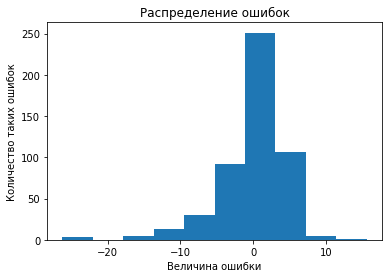

In [14]:
fig, subplot = plt.subplots()

subplot.hist(y_pred - y_true)

subplot.set_title('Распределение ошибок')
subplot.set_xlabel('Величина ошибки')
subplot.set_ylabel('Количество таких ошибок')
fig.show()

теперь посмотрим, какие метрики подходят для оценки качества линейной регрессии

#### RMSE

Root Mean Square Error (RMSE) - это базовая метрика для определения качества линейной регрессии

$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}
$$

Для каждого предсказанного значения $\hat{y}_i$ мы считаем квадрат отклонения от фактического значения и считаем среднее по полученным величинам

In [15]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('RMSE = %s' % rmse)

RMSE = 4.679191295697281


#### Коэффициент детерминации

Название - калька английского термина *coefficient of determination*. Наилучшее возможное значение 1.0, чем меньше тем хуже. Само значение коэффициента растёт с ростом числа предикторов - тут следует воспользоваться принципом Оккама - чем меньше используется предикторов при сопоставимом качестве, тем лучше. Коэффициент показывает, насколько условная дисперсия модели отличается от дисперсии реальных значений Y. Если этот коэффициент близок к 1, то условная дисперсия модели достаточно мала и весьма вероятно, что модель неплохо описывает данные.

$$
R^2 = 1 - \frac{\sum_{i=1}^{N}(\hat{y} - y_i)^2}{\sum_{i=1}^{N}(y_i-\overline{y})^2}
$$

In [16]:
from sklearn.metrics import r2_score

print("r2_score = %s" % r2_score(y_true, y_pred))

r2_score = 0.7406426641094095


#### Mean absolute error

Для оценки качества регрессии можно использовать среднюю абсолютную ошибку
$$
MAE = \frac{1}{N}\sum_{i=1}\mid y_i - \hat{y}\mid
$$

In [16]:
from sklearn.metrics import mean_absolute_error

print("MAE = %s" % mean_absolute_error(
    reg.predict(features), y)
)

MAE = 3.270862810900316


Про другие ошибки можно почитать в [официальной документации](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) в разделе про метрики регрессии.

## Итоги занятия

* ML позволяет решать бизнес-задачи
* внутри не магия, а очень много математики
* все алгоритмы есть в sklearn, самому математику знать необязательно

# Жизненный цикл ML проекта

Мы познакомились с машинным обучением на примере алгоритма регрессии.

В бизнесе моделирование - это только маленькая часть проекта по машинному обучению, который состоит из нескольких этапов. Эти этапы описаны в стандарте CRISP-DM

## Что такое CRISP-DM

[CRISP-DM](https://ru.wikipedia.org/wiki/CRISP-DM) (Cross-Industry Standard Process for Data Mining) - это методология развития  проектов с машинным обучением, основные шаги которой представлены на диаграмме

![crisp-dm](img/CRISP-DM_Process.jpg)

## Выявление бизнес-требований

Самый важный этап - понимание потребностей бизнеса

![business_understanding](img/business_understanding.png)

## Подготовка данных

Разбиваем на два этапа:

* Обзор доступных данных (data undestanding): EDA (Exploratory data analysis)
* Преобразования и структурирование данных (data_preparation): ETL (Extract, transformation, load)

![data_understanding.png](img/data_understanding.png)

## Обучение модели

тут снова два этапа

* обучение (Modeling)
* оценка качества (Evaluation)

## Применение модели

Выкатывание в продакшн (deployment) - последний этап.

На этом этапе поделие выпускается "в свет": начинаем мониторить онлайн-метрики

## Итоги занятия

* ML проекты рождаются, растут и выкатываются в прод
* плохо прошёл хотя бы один из этапов - весь проект завалится, потому что они связаны

# Виды ML задач

Алгоритмы машинного обучения можно разделить на несколько больших групп

![ml_problems.jpg](img/ml_problems.jpeg)

Для наглядности к каждому типу задач ML приведены бизнес-задачи, который алгоритмы этого семейства решают

## Обучение с учителем (supervised learning)

Нужна размеченная выборка

### Классификация (classification)

Метки дискретные (называются классами)

### Регрессия (regression)

Метки непрерывные


## Обучение без учителя (unsupervised learning)

Размечать выборку не нужно

### Кластеризация (clustering)

Разделить объекты на группы таким образом

### Снижение размерности (dimension reduction)

снизить количество фичей


## Обучение с подкреплением (reinforcement learning)

Обучающей выборки не существует. Алгоритм является агентом, который взаимодействует со средой. Если взаимодействие успешное, агент получает вознаграждение, а если неуспешное то штраф. 

# Для самостоятельного изучения

* [Введение в ML от Константина Воронцова](http://www.machinelearning.ru/wiki/images/f/fc/Voron-ML-Intro-slides.pdf)
* [ML intro от Высшей школы экономики](https://yadi.sk/i/RajIebEkmqgzw)